In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bank-marketing-dataset/bank.csv


## Here’s a table summarizing the dataset features:

| **Feature**  | **Description**                                                                                     | **Type**         |
|--------------|-----------------------------------------------------------------------------------------------------|------------------|
| **age**      | The age of the customer.                                                                           | Numerical        |
| **job**      | The type of job or occupation of the customer (e.g., 'admin', 'blue-collar', 'student').           | Categorical      |
| **marital**  | The marital status of the customer (e.g., 'married', 'single', 'divorced').                       | Categorical      |
| **education**| The level of education of the customer (e.g., 'primary', 'secondary', 'tertiary').                 | Categorical      |
| **default**  | Whether the customer has credit in default (e.g., 'yes', 'no').                                    | Binary Categorical|
| **balance**  | The account balance of the customer.                                                                | Numerical        |
| **housing**  | Whether the customer has a housing loan (e.g., 'yes', 'no').                                       | Binary Categorical|
| **loan**     | Whether the customer has a personal loan (e.g., 'yes', 'no').                                      | Binary Categorical|
| **contact**  | The type of communication used to contact the customer (e.g., 'telephone', 'cellular').            | Categorical      |
| **day**      | The last contact day of the month (usually between 1 and 31).                                      | Numerical        |
| **month**    | The last contact month of the year (e.g., 'jan', 'feb', 'mar').                                    | Categorical      |
| **duration** | Duration of the last contact in seconds.                                                            | Numerical        |
| **campaign** | Number of contacts performed during this campaign.                                                  | Numerical        |
| **pdays**    | Number of days since the client was last contacted from a previous campaign (where -1 means not previously contacted). | Numerical        |
| **previous** | Number of contacts performed before this campaign.                                                  | Numerical        |
| **poutcome** | Outcome of the previous marketing campaign (e.g., 'success', 'failure', 'unknown').                 | Categorical      |
| **deposit**  | Whether the customer subscribed to a term deposit (e.g., 'yes', 'no').                             | Binary Categorical|


# 1- XGBoost



| **Feature**             | **Description**                                                                                              |
|-------------------------|--------------------------------------------------------------------------------------------------------------|
| **Boosting Technique**  | Based on gradient boosting, builds models sequentially to correct errors of previous models.                 |
| **Performance**         | Known for speed and accuracy, includes optimizations like parallel processing and tree pruning.              |
| **Regularization**      | Incorporates L1 (Lasso) and L2 (Ridge) regularization to avoid overfitting and improve generalization.       |
| **Handling Missing Values** | Can handle missing values internally, useful for incomplete datasets.                                    |
| **Flexibility**         | Supports various tasks: regression, classification, and ranking.                                            |
| **Feature Importance**  | Provides insights into feature importance, aiding in model understanding and feature engineering.            |
![](https://www.researchgate.net/publication/372280082/figure/fig5/AS:11431281176878671@1690283606155/XGBoost-classification-model.png)

# 2-Logistic Regression

| **Aspect**               | **Description**                                                                                      |
|--------------------------|------------------------------------------------------------------------------------------------------|
| **Concept**              | **Binary Outcome**: Predicts the probability of belonging to a particular class (e.g., yes/no, 1/0).<br>**Logistic Function**: Uses the sigmoid function to map predicted values to probabilities, transforming input values into a range between 0 and 1. |
| **Mathematics Behind It**| **Linear Combination**: Starts with \( z = b_0 + b_1x_1 + b_2x_2 + \cdots + b_nx_n \), where \( b_0 \) is the intercept and \( b_i \) are the coefficients for each feature \( x_i \).<br>**Sigmoid Function**: Applies \( \sigma(z) = \frac{1}{1 + e^{-z}} \) to output a probability between 0 and 1. |
| **Prediction**           | **Probability**: Output of the sigmoid function represents the probability of the positive class.<br>**Classification**: Uses a threshold (usually 0.5) to classify outcomes; above 0.5 predicts the positive class, otherwise the negative class. |
| **Training**             | **Cost Function**: Uses cross-entropy loss (log loss): \( J(\theta) = -\frac{1}{m} \sum_{i=1}^m [y_i \log(h_\theta(x_i)) + (1 - y_i) \log(1 - h_\theta(x_i))] \).<br>**Optimization**: Model parameters are adjusted to minimize the cost function using techniques like Gradient Descent. |
| **Interpretation**       | **Coefficients**: \( b_i \) values represent the impact of each feature on the probability of the positive class. Positive coefficients increase the probability; negative coefficients decrease it. |
| **Applications**         | Widely used in medicine (predicting disease presence), finance (predicting credit risk), and marketing (predicting customer behavior). |


![](https://www.ejable.com/wp-content/uploads/2023/11/linear-regression-vs-logistic-regression-2.webp)

In [69]:
df = pd.read_csv("/kaggle/input/bank-marketing-dataset/bank.csv")

In [70]:
import numpy as np 
import pandas as pd
import seaborn as sns
import xgboost as xgb
import plotly.io as pio
from sklearn import tree
from sklearn.svm import SVC
import plotly.express as px
import matplotlib.pyplot as plt 
from sklearn.metrics import r2_score
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder

In [8]:
df.head()

age         job  marital  education default  balance housing loan  contact  \
0   59      admin.  married  secondary      no     2343     yes   no  unknown   
1   56      admin.  married  secondary      no       45      no   no  unknown   
2   41  technician  married  secondary      no     1270     yes   no  unknown   
3   55    services  married  secondary      no     2476     yes   no  unknown   
4   54      admin.  married   tertiary      no      184      no   no  unknown   

   day month  duration  campaign  pdays  previous poutcome deposit  
0    5   may      1042         1     -1         0  unknown     yes  
1    5   may      1467         1     -1         0  unknown     yes  
2    5   may      1389         1     -1         0  unknown     yes  
3    5   may       579         1     -1         0  unknown     yes  
4    5   may       673         2     -1         0  unknown     yes

Missing Values:
Empty DataFrame
Columns: [Missing Values, Percentage]
Index: []

Summary Statistics:
                age           job       marital     education       default  \
count  11162.000000  11162.000000  11162.000000  11162.000000  11162.000000   
mean      41.231948      4.487905      1.199337      1.285164      0.015051   
std       11.913369      3.225132      0.625552      0.749478      0.121761   
min       18.000000      0.000000      0.000000      0.000000      0.000000   
25%       32.000000      1.000000      1.000000      1.000000      0.000000   
50%       39.000000      4.000000      1.000000      1.000000      0.000000   
75%       49.000000      7.000000      2.000000      2.000000      0.000000   
max       95.000000     11.000000      2.000000      3.000000      1.000000   

            balance       housing          loan       contact           day  \
count  11162.000000  11162.000000  11162.000000  11162.000000  11162.000000   
mean    1528.538524      0.47

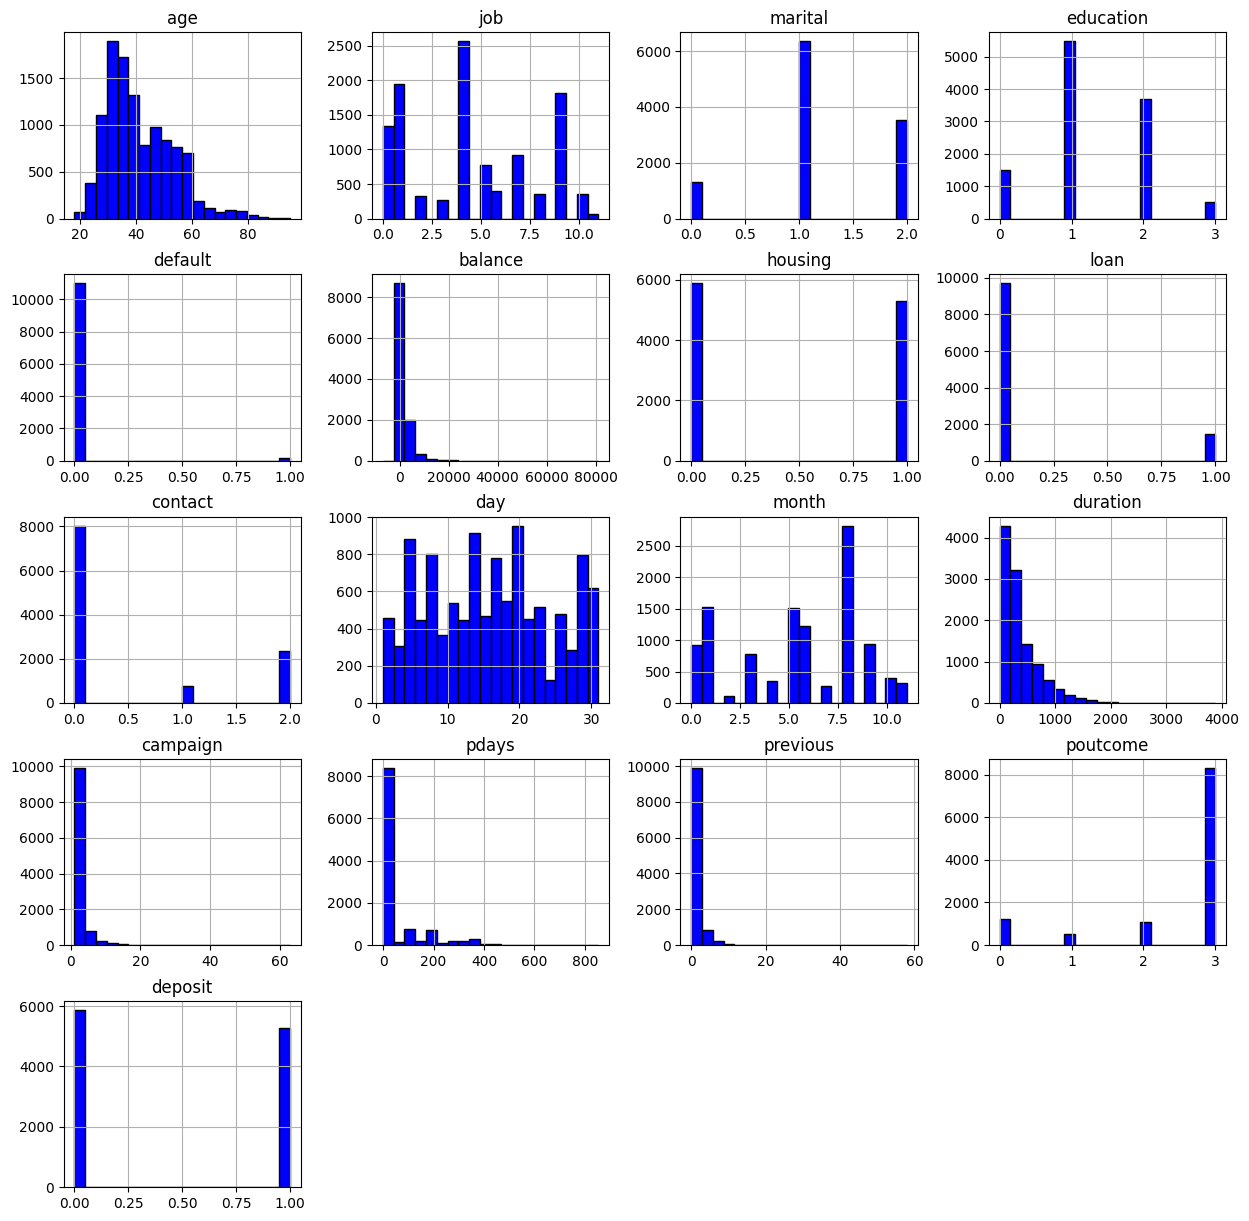

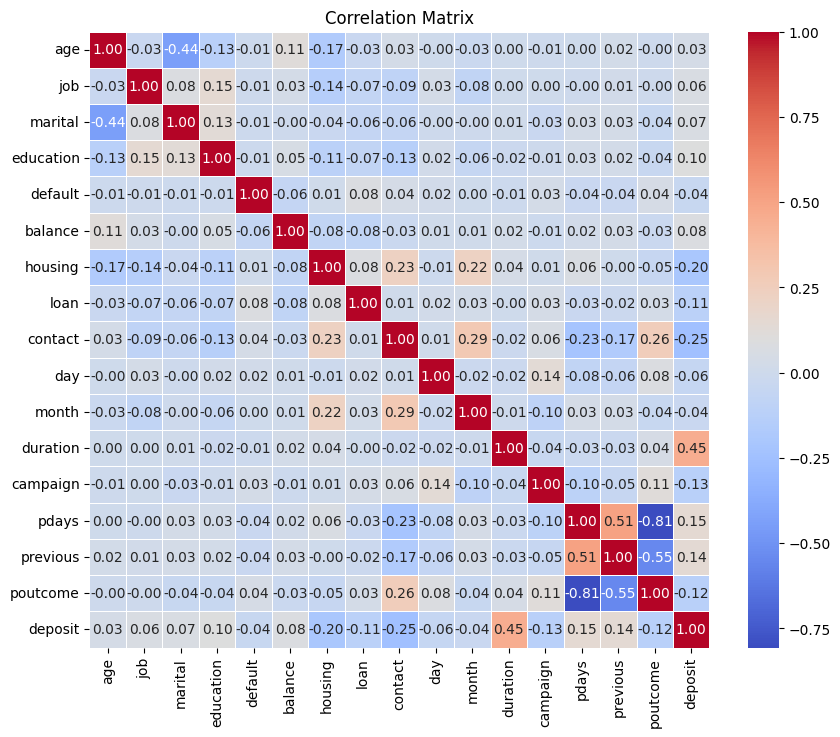


Correlation with Target (deposit):
deposit      1.000000
duration     0.451919
pdays        0.151593
previous     0.139867
education    0.095948
balance      0.081129
marital      0.067610
job          0.063395
age          0.034901
month       -0.037121
default     -0.040680
day         -0.056326
loan        -0.110580
poutcome    -0.122369
campaign    -0.128081
housing     -0.203888
contact     -0.249847
Name: deposit, dtype: float64


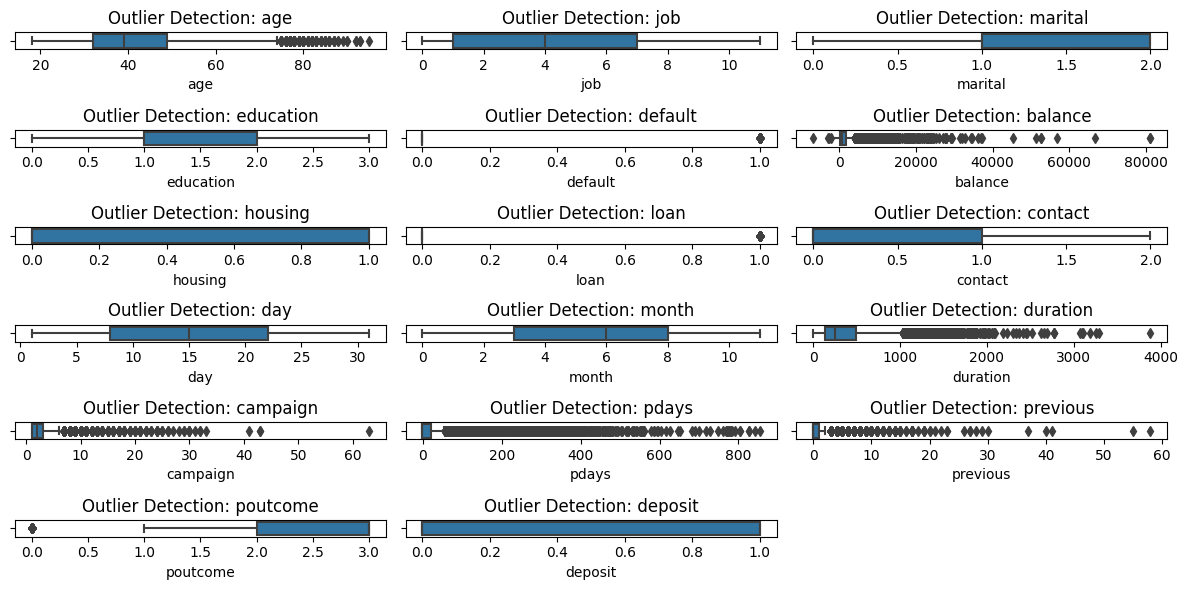

In [71]:
class AutoEDA:
    def __init__(self, df):
        """Initialize the class with a DataFrame."""
        self.df = df
        self._encode_categorical_columns()

    def _encode_categorical_columns(self):
        """Automatically encode categorical columns to numeric using Label Encoding."""
        categorical_cols = self.df.select_dtypes(include=['object']).columns
        self.label_encoders = {}
        for col in categorical_cols:
            le = LabelEncoder()
            self.df[col] = le.fit_transform(self.df[col])
            self.label_encoders[col] = le  # Store the encoder for future reference if needed
    
    def missing_values(self):
        """Display missing values count and percentage."""
        missing_data = self.df.isnull().sum()
        missing_percentage = (self.df.isnull().mean() * 100).round(2)
        missing_df = pd.DataFrame({'Missing Values': missing_data, 'Percentage': missing_percentage})
        return missing_df[missing_df['Missing Values'] > 0].sort_values(by='Missing Values', ascending=False)

    def summary_stats(self):
        """Show summary statistics of numeric columns."""
        return self.df.describe()

    def correlation_matrix(self):
        """Plot a correlation heatmap."""
        plt.figure(figsize=(10, 8))
        sns.heatmap(self.df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
        plt.title('Correlation Matrix')
        plt.show()

    def target_correlation(self, target):
        """Show correlation of all variables with the target variable."""
        correlations = self.df.corr()[target].sort_values(ascending=False)
        return correlations

    def plot_distributions(self):
        """Plot distributions for all numeric features."""
        numeric_cols = self.df.select_dtypes(include=['float64', 'int64']).columns
        self.df[numeric_cols].hist(figsize=(15, 15), bins=20, color='blue', edgecolor='black')
        plt.show()

    def outlier_detection(self):
        """Detect outliers using box plots."""
        numeric_cols = self.df.select_dtypes(include=['float64', 'int64']).columns
        plt.figure(figsize=(12, 6))
        for i, col in enumerate(numeric_cols, 1):
            plt.subplot(len(numeric_cols)//3+1, 3, i)
            sns.boxplot(x=self.df[col])
            plt.title(f'Outlier Detection: {col}')
        plt.tight_layout()
        plt.show()

    def run_eda(self, target=None):
        """Run all EDA steps automatically."""
        print("Missing Values:")
        print(self.missing_values())
        print("\nSummary Statistics:")
        print(self.summary_stats())
        self.plot_distributions()
        self.correlation_matrix()
        if target:
            print(f"\nCorrelation with Target ({target}):")
            print(self.target_correlation(target))
        self.outlier_detection()

df1 = pd.read_csv('/kaggle/input/bank-marketing-dataset/bank.csv')
eda = AutoEDA(df1)
eda.run_eda(target='deposit')


# Correlation data

In [10]:
correlation_data = {'Feature': ['deposit', 'duration', 'pdays', 'previous', 'education', 'balance', 'marital', 'job', 'age', 'month', 'default', 'day', 'loan', 'poutcome', 'campaign', 'housing', 'contact'],'Correlation_with_Deposit': [1.000000, 0.451919, 0.151593, 0.139867, 0.095948, 0.081129, 0.067610, 0.063395, 0.034901, -0.037121, -0.040680, -0.056326, -0.110580, -0.122369, -0.128081, -0.203888, -0.249847]}
correlation_df = pd.DataFrame(correlation_data) # Create the DataFrame
correlation_df # Display the DataFrame

Feature  Correlation_with_Deposit
0     deposit                  1.000000
1    duration                  0.451919
2       pdays                  0.151593
3    previous                  0.139867
4   education                  0.095948
5     balance                  0.081129
6     marital                  0.067610
7         job                  0.063395
8         age                  0.034901
9       month                 -0.037121
10    default                 -0.040680
11        day                 -0.056326
12       loan                 -0.110580
13   poutcome                 -0.122369
14   campaign                 -0.128081
15    housing                 -0.203888
16    contact                 -0.249847

In [11]:
df1.head()

age  job  marital  education  default  balance  housing  loan  contact  \
0   59    0        1          1        0     2343        1     0        2   
1   56    0        1          1        0       45        0     0        2   
2   41    9        1          1        0     1270        1     0        2   
3   55    7        1          1        0     2476        1     0        2   
4   54    0        1          2        0      184        0     0        2   

   day  month  duration  campaign  pdays  previous  poutcome  deposit  
0    5      8      1042         1     -1         0         3        1  
1    5      8      1467         1     -1         0         3        1  
2    5      8      1389         1     -1         0         3        1  
3    5      8       579         1     -1         0         3        1  
4    5      8       673         2     -1         0         3        1

In [12]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [13]:
df1.shape

(11162, 17)

In [14]:

# Set renderer to 'notebook' for Kaggle
pio.renderers.default = 'notebook'

# Create a box plot to visualize campaign contacts distribution by default status
fig = px.box(
    df1, 
    x='default', 
    y='campaign', 
    title='Distribution of Campaign Contacts by Default Status',
    labels={'default': 'Default Status', 'campaign': 'Number of Contacts'},
    color='default'  # Color differentiation based on default status
)

# Enhance layout with titles and dark theme
fig.update_layout(
    xaxis_title='Default Status',
    yaxis_title='Number of Contacts',
    template='plotly_dark'  # Dark theme for better visuals
)

# Display the plot
fig.show()


In [15]:
default_data = {'Default': ['No', 'Yes'],'int_Default':['0','1'],'Count': [10994, 168]}
default_df = pd.DataFrame(default_data) # Create the DataFrame
default_df  # Display the DataFrame

Default int_Default  Count
0      No           0  10994
1     Yes           1    168

In [16]:
# Create a scatter plot using Plotly
fig = px.scatter(
    df1, 
    x='pdays', 
    y='campaign', 
    color='deposit',
    title='Relationship Between Pdays and Number of Campaign Contacts',
    labels={'pdays': 'Pdays', 'campaign': 'Number of Contacts'}
)

# Update layout for better visuals
fig.update_layout(
    xaxis_title='Pdays',
    yaxis_title='Number of Contacts',
    template='plotly_dark'
)

# Show plot
fig.show()


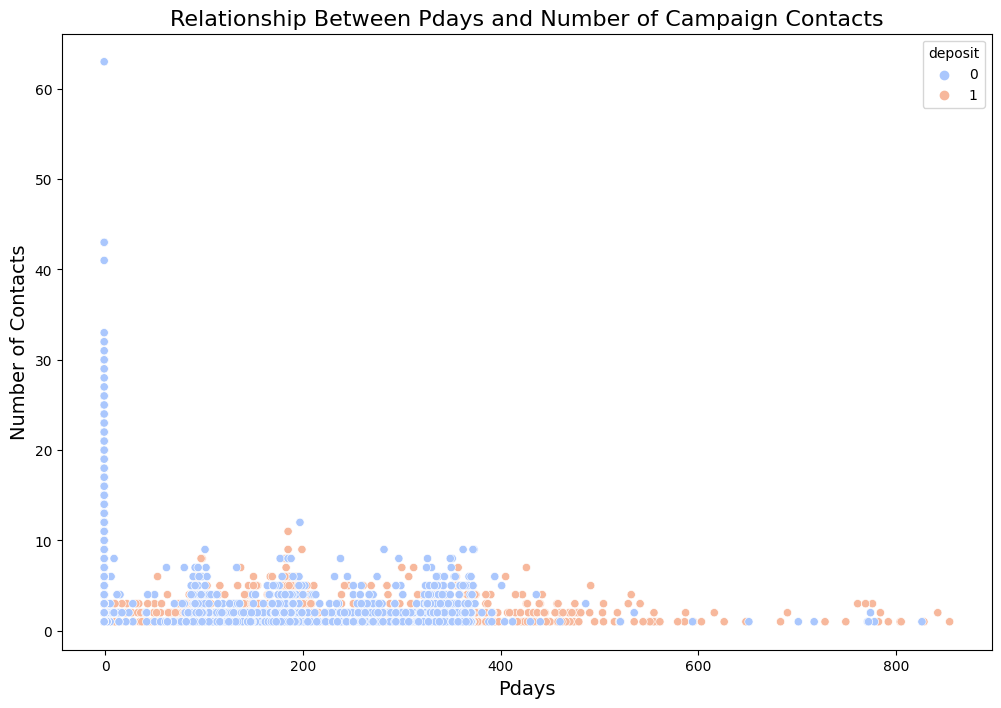

In [17]:
# Scatter plot to visualize the relationship between pdays and campaign
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df1, x='pdays', y='campaign', hue='deposit', palette='coolwarm')

# Add titles and labels
plt.title('Relationship Between Pdays and Number of Campaign Contacts', fontsize=16)
plt.xlabel('Pdays', fontsize=14)
plt.ylabel('Number of Contacts', fontsize=14)

plt.show()


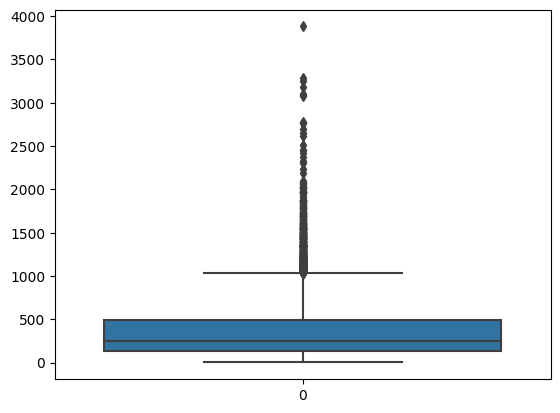

In [18]:
sns.boxplot(df1['duration']);

In [19]:
# Create a scatter plot using Plotly
fig = px.scatter(
    df1, 
    x='duration', 
    y='campaign', 
    color='deposit',
    title='Relationship Between Duration of Last Contact and Number of Campaign Contacts',
    labels={'duration': 'Duration (seconds)', 'campaign': 'Number of Contacts'}
)

# Update layout for better visuals
fig.update_layout(
    xaxis_title='Duration (seconds)',
    yaxis_title='Number of Contacts',
    template='plotly_dark'
)

# Show plot
fig.show()


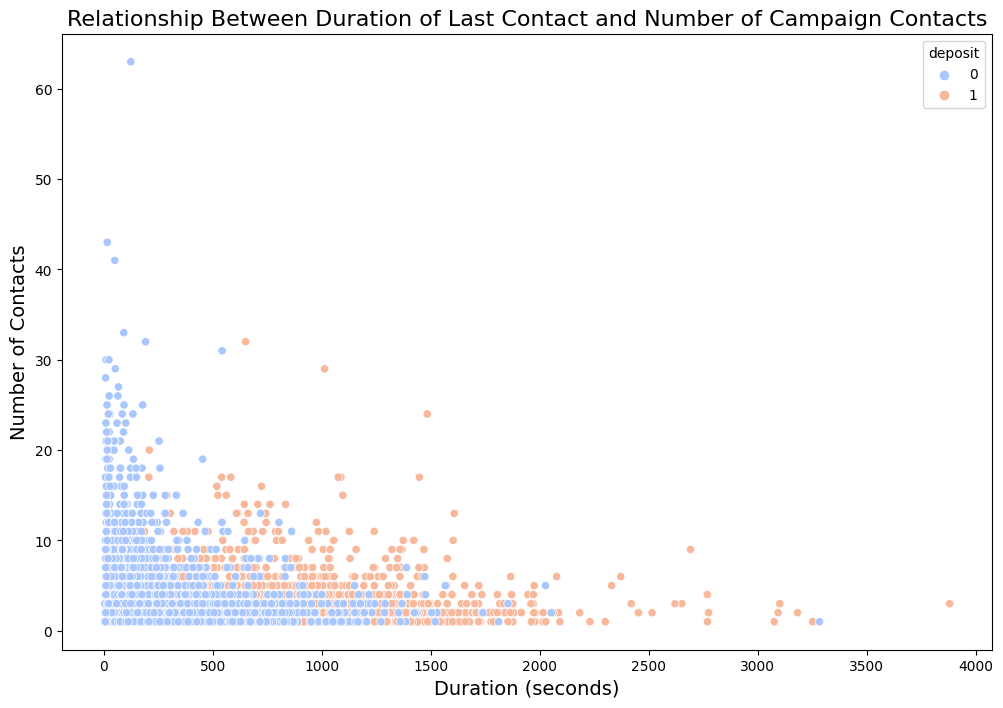

In [20]:
# Scatter plot to visualize the relationship between duration and campaign
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df1, x='duration', y='campaign', hue='deposit', palette='coolwarm')

# Add titles and labels
plt.title('Relationship Between Duration of Last Contact and Number of Campaign Contacts', fontsize=16)
plt.xlabel('Duration (seconds)', fontsize=14)
plt.ylabel('Number of Contacts', fontsize=14)

plt.show()


In [21]:
# Group and count the data by month and deposit
count_data = df1.groupby(['month', 'deposit']).size().reset_index(name='count')

# Create a bar plot using Plotly
fig = px.bar(
    count_data, 
    x='month', 
    y='count', 
    color='deposit', 
    title='Count of Months by Deposit Status',
    labels={'month': 'Month', 'count': 'Count', 'deposit': 'Deposit'},
    text='count'
)

# Update layout for better visuals
fig.update_layout(
    xaxis_title='Month',
    yaxis_title='Count',
    legend_title='Deposit',
    xaxis_tickangle=-45,  # Rotate x-axis labels for better readability
    template='plotly_dark'
)

# Show plot
fig.show()


In [22]:
month_data = {'Month': ['May', 'Aug', 'Jul', 'Jun', 'Nov', 'Apr', 'Feb', 'Oct', 'Jan', 'Sep', 'Mar', 'Dec'],'int_Month':['8','1','5','6','9','0','3','10','4','11','7','2'],'Count': [2824, 1519, 1514, 1222, 943, 923, 776, 392, 344, 319, 276, 110]}
month_df = pd.DataFrame(month_data) # Create the DataFrame
month_df # Display the DataFrame

Month int_Month  Count
0    May         8   2824
1    Aug         1   1519
2    Jul         5   1514
3    Jun         6   1222
4    Nov         9    943
5    Apr         0    923
6    Feb         3    776
7    Oct        10    392
8    Jan         4    344
9    Sep        11    319
10   Mar         7    276
11   Dec         2    110

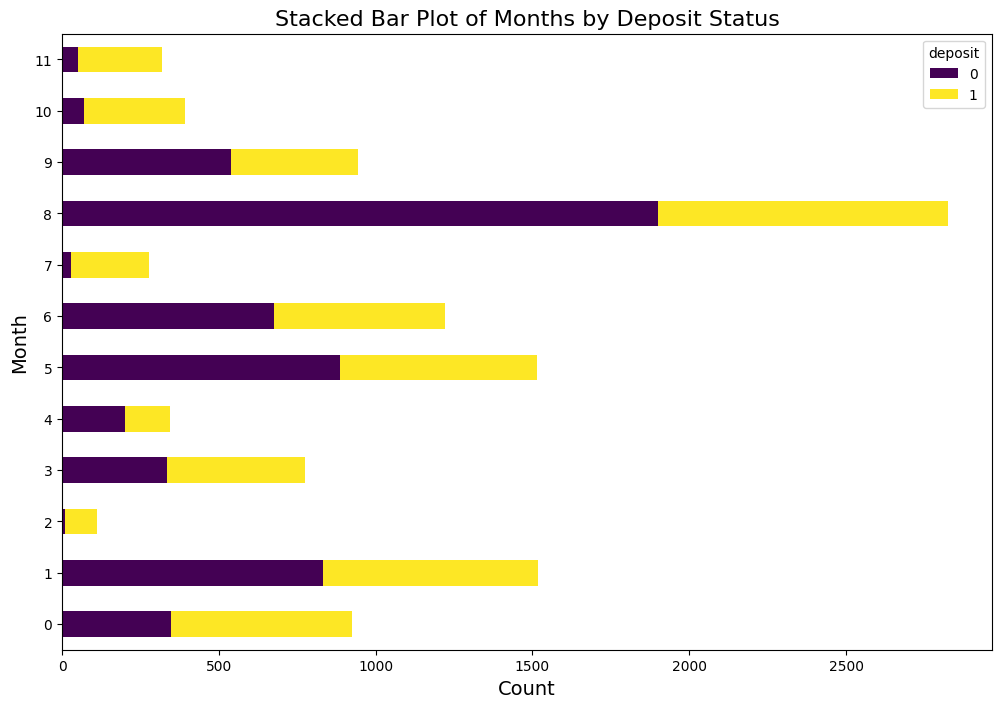

In [23]:
# Group data by month and deposit
count_data = df1.groupby(['month', 'deposit']).size().unstack().fillna(0)

# Create a bar plot
count_data.plot(kind='barh', stacked=True, figsize=(12, 8), colormap='viridis')

# Add titles and labels
plt.title('Stacked Bar Plot of Months by Deposit Status', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Month', fontsize=14)

plt.show()


In [24]:
# Group and count the data by contact and deposit
count_data = df1.groupby(['contact', 'deposit']).size().reset_index(name='count')

# Create a bar plot using Plotly
fig = px.bar(
    count_data, 
    x='contact', 
    y='count', 
    color='deposit', 
    title='Count of Contact Types by Deposit Status',
    labels={'contact': 'Contact Type', 'count': 'Count', 'deposit': 'Deposit'},
    text='count'
)

# Update layout for better visuals
fig.update_layout(
    xaxis_title='Contact Type',
    yaxis_title='Count',
    legend_title='Deposit',
    xaxis_tickangle=-45,  # Rotate x-axis labels for better readability
    template='plotly_dark'
)

# Show plot
fig.show()


In [25]:
contact_data = {'Contact Type': ['Cellular', 'Unknown', 'Telephone'],'int_Contact':['0','2','1'],'Count': [8042, 2346, 774]}
contact_df = pd.DataFrame(contact_data)
contact_df

Contact Type int_Contact  Count
0     Cellular           0   8042
1      Unknown           2   2346
2    Telephone           1    774

In [26]:
# Group and count the data by default and deposit
count_data = df1.groupby(['default', 'deposit']).size().reset_index(name='count')

# Create a bar plot using Plotly
fig = px.bar(
    count_data, 
    x='default', 
    y='count', 
    color='deposit', 
    title='Count of Default Status by Deposit Status',
    labels={'default': 'Default Status', 'count': 'Count', 'deposit': 'Deposit'},
    text='count'
)

# Update layout for better visuals
fig.update_layout(
    xaxis_title='Default Status',
    yaxis_title='Count',
    legend_title='Deposit',
    xaxis_tickangle=-45,  # Rotate x-axis labels for better readability
    template='plotly_dark'
)

# Show plot
fig.show()


In [27]:
data = {'Default': ['No', 'Yes'],'int_Default': ['0', '1'],'Count': [10994, 168]}
df = pd.DataFrame(data)
df

Default int_Default  Count
0      No           0  10994
1     Yes           1    168

In [28]:
# Group and count the data by education and deposit
count_data = df1.groupby(['education', 'deposit']).size().reset_index(name='count')

# Create a bar plot using Plotly
fig = px.bar(
    count_data, 
    x='education', 
    y='count', 
    color='deposit', 
    title='Count of Education Levels by Deposit Status',
    labels={'education': 'Education Level', 'count': 'Count', 'deposit': 'Deposit'},
    text='count'
)

# Update layout for better visuals
fig.update_layout(
    xaxis_title='Education Level',
    yaxis_title='Count',
    legend_title='Deposit',
    xaxis_tickangle=-45,  # Rotate x-axis labels for better readability
    template='plotly_dark'
)

# Show plot
fig.show()


In [29]:
education_data = {'Education Level': ['Secondary', 'Tertiary', 'Primary', 'Unknown'],'int_Education':['1','2','0','3'],'Count': [5476, 3689, 1500, 497]}
education_df = pd.DataFrame(education_data)  # Create the DataFrame
education_df   # Display the DataFrame

Education Level int_Education  Count
0       Secondary             1   5476
1        Tertiary             2   3689
2         Primary             0   1500
3         Unknown             3    497

In [30]:
# Group and count the data by marital status and deposit
count_data = df1.groupby(['marital', 'deposit']).size().reset_index(name='count')

# Create a bar plot using Plotly
fig = px.bar(
    count_data, 
    x='marital', 
    y='count', 
    color='deposit', 
    title='Count of Marital Status by Deposit Status',
    labels={'marital': 'Marital Status', 'count': 'Count', 'deposit': 'Deposit'},
    text='count'
)

# Update layout for better visuals
fig.update_layout(
    xaxis_title='Marital Status',
    yaxis_title='Count',
    legend_title='Deposit',
    xaxis_tickangle=-45,  # Rotate x-axis labels for better readability
    template='plotly_dark'
)

# Show plot
fig.show()


In [31]:
data = {'Marital Status': ['Married', 'Single', 'Divorced'],'int_Marital':['1','2','0'],'Count': [6351, 3518, 1293]}
df = pd.DataFrame(data)
df   # Display the DataFrame

Marital Status int_Marital  Count
0        Married           1   6351
1         Single           2   3518
2       Divorced           0   1293

In [32]:
# Group and count the data by job and deposit
count_data = df1.groupby(['job', 'deposit']).size().reset_index(name='count')

# Create a bar plot using Plotly
fig = px.bar(
    count_data, 
    x='job', 
    y='count', 
    color='deposit', 
    title='Count of Jobs by Deposit Status',
    labels={'job': 'Job', 'count': 'Count', 'deposit': 'Deposit'},
    text='count'
)

# Update layout for better visuals
fig.update_layout(
    xaxis_title='Job',
    yaxis_title='Count',
    legend_title='Deposit',
    xaxis_tickangle=-45,  # Rotate x-axis labels for better readability
    template='plotly_dark'
)

# Show plot
fig.show()


In [33]:
# Create a DataFrame
data = {'Name': ['management', 'blue-collar','technician','admin','services','retired','self-employed','student','unemployed','entrepreneur','housemaid','unknown'],'int_number':['4','1','9','0','7','5','6','8','10','2','3','11'],'Total': ['2566', '1944','1823','1334','923','778','405','360','357','328','274','70']}
df = pd.DataFrame(data)
df

Name int_number Total
0      management          4  2566
1     blue-collar          1  1944
2      technician          9  1823
3           admin          0  1334
4        services          7   923
5         retired          5   778
6   self-employed          6   405
7         student          8   360
8      unemployed         10   357
9    entrepreneur          2   328
10      housemaid          3   274
11        unknown         11    70

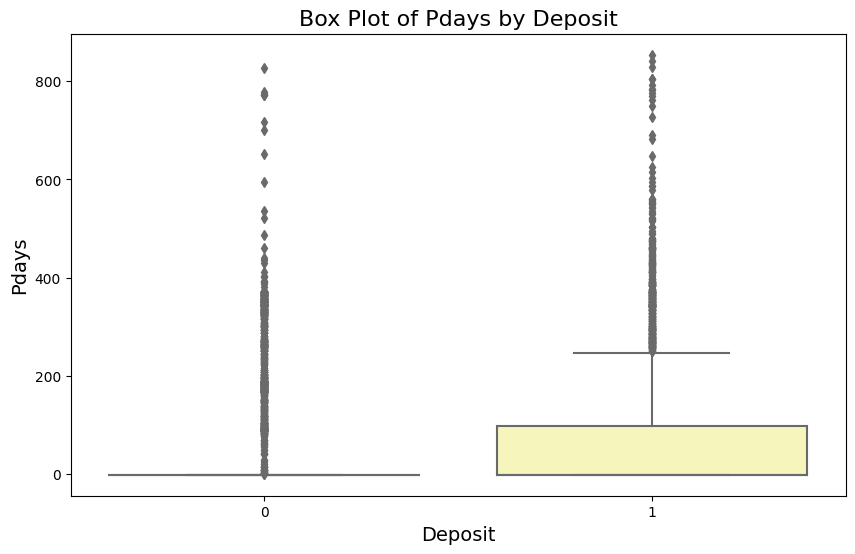

In [34]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df1, x='deposit', y='pdays', palette='Set3')

# Add titles and labels
plt.title('Box Plot of Pdays by Deposit', fontsize=16)
plt.xlabel('Deposit', fontsize=14)
plt.ylabel('Pdays', fontsize=14)

plt.show()


In [35]:
# Group and count the data by housing and deposit
count_data = df1.groupby(['housing', 'deposit']).size().reset_index(name='count')

# Create a stacked bar plot using Plotly
fig = px.bar(
    count_data, 
    x='housing', 
    y='count', 
    color='deposit', 
    title='Count of Housing by Deposit Status', 
    labels={'housing': 'Housing', 'count': 'Count', 'deposit': 'Deposit'},
    text='count'
)

# Update layout for better visuals
fig.update_layout(
    barmode='stack',
    xaxis_title='Housing',
    yaxis_title='Count',
    legend_title='Deposit',
    template='plotly_dark'  # Dark theme
)

# Show plot
fig.show()


In [36]:
data = {'Housing': ['No', 'Yes'],'int_Housing': ['0', '1'],'Housing_Count': [5881, 5281],'Deposit': ['No', 'Yes'],'int_Deposit': ['0', '1'],'Deposit_Count': [5873, 5289]}
df = pd.DataFrame(data)
df

Housing int_Housing  Housing_Count Deposit int_Deposit  Deposit_Count
0      No           0           5881      No           0           5873
1     Yes           1           5281     Yes           1           5289

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



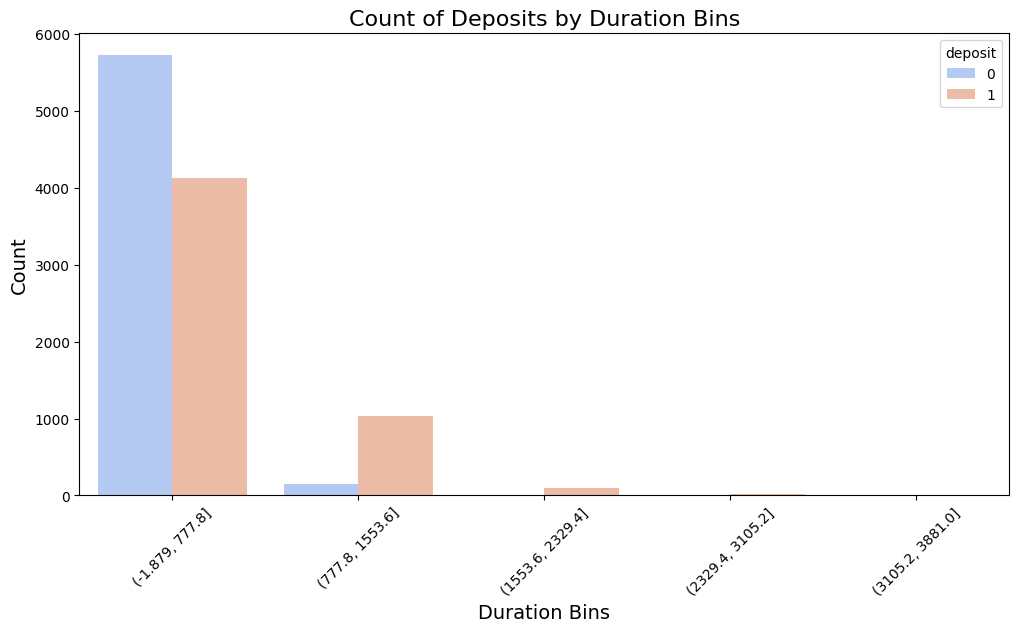

In [37]:
# Bin the 'duration' into ranges
df1['duration_bins'] = pd.cut(df1['duration'], bins=5)

# Bar plot
plt.figure(figsize=(12, 6))
sns.countplot(data=df1, x='duration_bins', hue='deposit', palette='coolwarm')

# Add titles and labels
plt.title('Count of Deposits by Duration Bins', fontsize=16)
plt.xlabel('Duration Bins', fontsize=14)
plt.ylabel('Count', fontsize=14)

plt.xticks(rotation=45)
plt.show()


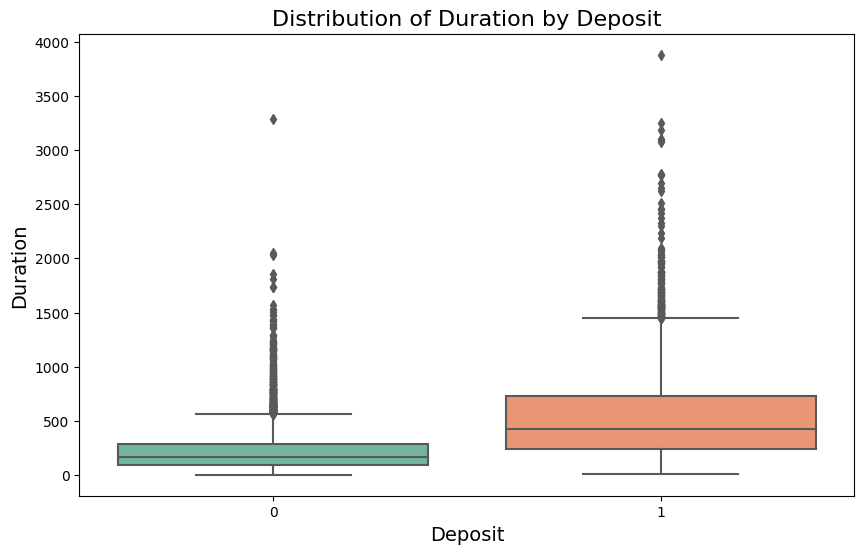

In [38]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df1, x='deposit', y='duration', palette='Set2')

# Add titles and labels
plt.title('Distribution of Duration by Deposit', fontsize=16)
plt.xlabel('Deposit', fontsize=14)
plt.ylabel('Duration', fontsize=14)

plt.show()


In [39]:
data = {'Deposit': ['No', 'Yes'],'Deposit_Count': [5873, 5289]}
df = pd.DataFrame(data)
df

Deposit  Deposit_Count
0      No           5873
1     Yes           5289

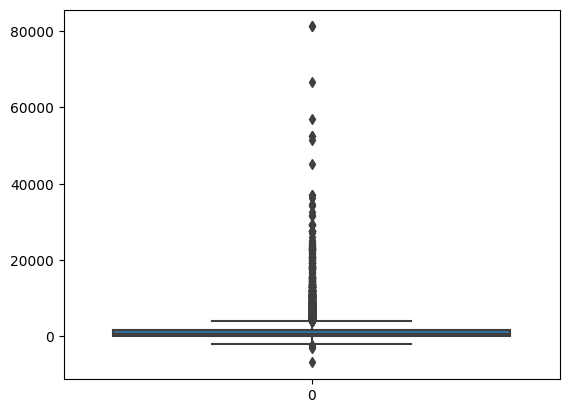

In [40]:
sns.boxplot(df1['balance']);

In [41]:
# Customize color and hover templates
count_data_long = df1.groupby(['housing', 'balance']).size().reset_index(name='Count')
fig = px.bar(
    count_data_long, 
    x='housing', 
    y='Count', 
    color='balance', 
    text='Count',
    title='Count Plot of Housing by Balance',
    labels={'balance': 'Balance', 'housing': 'Housing', 'Count': 'Count'},
    color_continuous_scale='Viridis'
)

# Customize the layout
fig.update_layout(
    barmode='stack',
    xaxis_title='Housing',
    yaxis_title='Count',
    legend_title='Balance',
    template='plotly_dark',  # Switch to a dark theme
    title_font_size=20,
    title_x=0.5
)

# Show plot
fig.show()


In [42]:
housing_data = {'Housing': ['No', 'Yes'],'int_Housing':['0','1'],'Count': [5881, 5281]}
housing_df = pd.DataFrame(housing_data)  # Create the DataFrame
housing_df  # Display the DataFrame

Housing int_Housing  Count
0      No           0   5881
1     Yes           1   5281

In [98]:
# Creating the bar plot
fig = px.bar(df_grouped, x='balance', color='loan', 
             labels={'balance': 'Balance', 'loan': 'Loan'},
             title='Bar Plot of Loan by Balance and Housing')

fig.show()

In [45]:
loan_data = {'Loan': ['No', 'Yes'],'int_Loan':['0','1'],'Count': [9702, 1460]}
loan_df = pd.DataFrame(loan_data) # Create the DataFrame
loan_df # Display the DataFrame

Loan int_Loan  Count
0   No        0   9702
1  Yes        1   1460

In [46]:
import plotly.express as px

# Aggregating the data
df_grouped = df1.groupby(['balance', 'housing'], as_index=False).agg({'loan': 'mean'})

# Creating the bar plot
fig = px.bar(df_grouped, x='balance', y='loan', color='housing', 
             labels={'balance': 'Balance', 'loan': 'Loan'},
             title='Bar Plot of Loan by Balance and Housing')

fig.show()


In [47]:
data = {'Loan': ['No', 'Yes'],'int_Loan': ['0', '1'],'Loan_Count': [9702, 1460],'Housing': ['No', 'Yes'],'int_Housing': ['0', '1'],'Housing_Count': [5881, 5281]}
df = pd.DataFrame(data)
df

Loan int_Loan  Loan_Count Housing int_Housing  Housing_Count
0   No        0        9702      No           0           5881
1  Yes        1        1460     Yes           1           5281

In [49]:
# Group and count the data by poutcome and default
count_data = df1.groupby(['poutcome', 'default']).size().reset_index(name='count')

# Create a bar plot using Plotly
fig = px.bar(
    count_data, 
    x='poutcome', 
    y='count', 
    color='default', 
    title='Count of Poutcome by Default Status',
    labels={'poutcome': 'Poutcome', 'count': 'Count', 'default': 'Default'},
    text='count'
)

# Update layout for better visuals
fig.update_layout(
    xaxis_title='Poutcome',
    yaxis_title='Count',
    legend_title='Default',
    xaxis_tickangle=-45,  # Rotate x-axis labels for better readability
    template='plotly_dark'
)

# Show plot
fig.show()


In [50]:
# Define the poutcome data
poutcome_data = {'Poutcome': ['Unknown', 'Failure', 'Success', 'Other'],'int_Poutcome': ['3', '0', '2', '1'],'Count': [8326, 1228, 1071, 537]}
poutcome_df = pd.DataFrame(poutcome_data)
# Define the default data
default_data = {'Default': ['No', 'Yes'],'int_Default': ['0', '1'],'Count': [10994, 168]}
default_df = pd.DataFrame(default_data)
# Add a column to identify the source of the data
poutcome_df['Source'] = 'Poutcome'
default_df['Source'] = 'Default'
# Concatenate the DataFrames
combined_df = pd.concat([poutcome_df, default_df], ignore_index=True)
# Display the combined DataFrame
combined_df

Poutcome int_Poutcome  Count    Source Default int_Default
0  Unknown            3   8326  Poutcome     NaN         NaN
1  Failure            0   1228  Poutcome     NaN         NaN
2  Success            2   1071  Poutcome     NaN         NaN
3    Other            1    537  Poutcome     NaN         NaN
4      NaN          NaN  10994   Default      No           0
5      NaN          NaN    168   Default     Yes           1

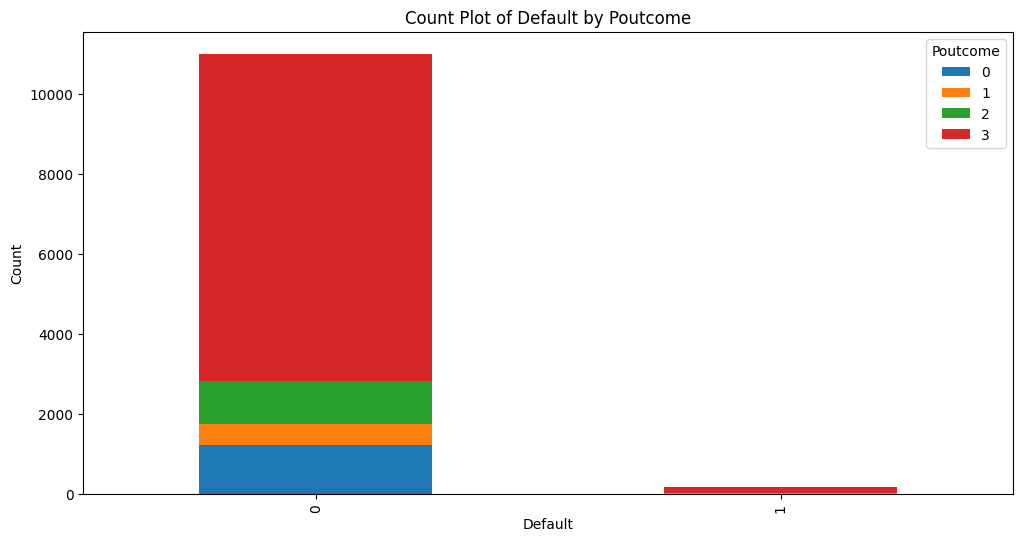

In [51]:
# sns.countplot(data=df1, x='default', hue='poutcome');
count_data = df1.groupby(['default', 'poutcome']).size().unstack().fillna(0)
# Plot using matplotlib
count_data.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel('Default')
plt.ylabel('Count')
plt.title('Count Plot of Default by Poutcome')
plt.legend(title='Poutcome')
plt.show()

In [52]:
# Create a box plot using Plotly
fig = px.box(df1, x='poutcome', y='campaign', title='Distribution of Number of Contacts by Poutcome',labels={'poutcome': 'Poutcome', 'campaign': 'Number of Contacts'})
# Update layout for better visuals
fig.update_layout(xaxis_title='Poutcome',yaxis_title='Number of Contacts',template='plotly_dark')
# Show plot
fig.show()


In [53]:
poutcome_data = {'Poutcome': ['Unknown', 'Failure', 'Success', 'Other'],'int_Poutcome':['3','0','2','1'],'Count': [8326, 1228, 1071, 537]}
poutcome_df = pd.DataFrame(poutcome_data) # Create the DataFrame
poutcome_df # Display the DataFrame

Poutcome int_Poutcome  Count
0  Unknown            3   8326
1  Failure            0   1228
2  Success            2   1071
3    Other            1    537

## SPlit X , Y

In [61]:
x = df1.iloc[:,:-1].values   # features 
y = df1.iloc[:,-1].values    # predict 

In [62]:
X_train , X_test , y_train , y_test = train_test_split(x,y,test_size=.20)

## Build Model
## 1. Logistic Regression

## I used in this model (solver='liblinear', max_iter=1000), to avoid mistakes and get the best quality.

In [63]:
logreg = LogisticRegression(solver='liblinear', max_iter=1000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [64]:
y_test

array([0, 1, 1, ..., 1, 0, 0])

In [65]:
y_pred = logreg.predict(X_test)
y_pred

array([0, 1, 0, ..., 0, 0, 0])

In [66]:
df1 = pd.DataFrame({'Actuall':y_test.flatten() , 'predicted' : y_pred.flatten()})
df1

Actuall  predicted
0           0          0
1           1          1
2           1          0
3           1          1
4           0          0
...       ...        ...
2228        1          1
2229        1          1
2230        1          0
2231        0          0
2232        0          0

[2233 rows x 2 columns]

In [67]:
r2 = r2_score(y_test, y_pred)
r2

0.2017676649489777

In [72]:
x = df1[['age','job','marital','education','default','balance','housing','loan',
        'contact','day','month','duration','campaign','pdays','previous','poutcome']]
y = df1['deposit']

In [73]:
X_train , X_test , y_train , y_test = train_test_split(x,y,test_size=.20)

In [74]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        11162 non-null  int64
 1   job        11162 non-null  int64
 2   marital    11162 non-null  int64
 3   education  11162 non-null  int64
 4   default    11162 non-null  int64
 5   balance    11162 non-null  int64
 6   housing    11162 non-null  int64
 7   loan       11162 non-null  int64
 8   contact    11162 non-null  int64
 9   day        11162 non-null  int64
 10  month      11162 non-null  int64
 11  duration   11162 non-null  int64
 12  campaign   11162 non-null  int64
 13  pdays      11162 non-null  int64
 14  previous   11162 non-null  int64
 15  poutcome   11162 non-null  int64
 16  deposit    11162 non-null  int64
dtypes: int64(17)
memory usage: 1.4 MB


## 2. K-Nearest Neighbors (KNN)

In [75]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train , y_train)

KNeighborsClassifier()

In [76]:
y_test

4264     1
8832     0
4699     1
10568    0
701      1
        ..
1137     1
10979    0
7239     0
1775     1
3015     1
Name: deposit, Length: 2233, dtype: int64

In [77]:
y_pred = model.predict(X_test)
y_pred

array([1, 0, 1, ..., 0, 1, 1])

In [78]:
accuracy_score(y_test , y_pred)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

Accuracy: 0.7474249888042992


## choose best k

In [79]:
# Define the range of k values to test
k_values = range(3,40,2)
test_accuracies = []

# Train the k-NN classifier with different values of k and evaluate on the test set
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)  # Train the model
    y_pred = knn.predict(X_test)  # Predict on the test set
    accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy
    test_accuracies.append(accuracy)

# Determine the best k
best_k = k_values[np.argmax(test_accuracies)]
print(f"The best k value is: {best_k}")

The best k value is: 13


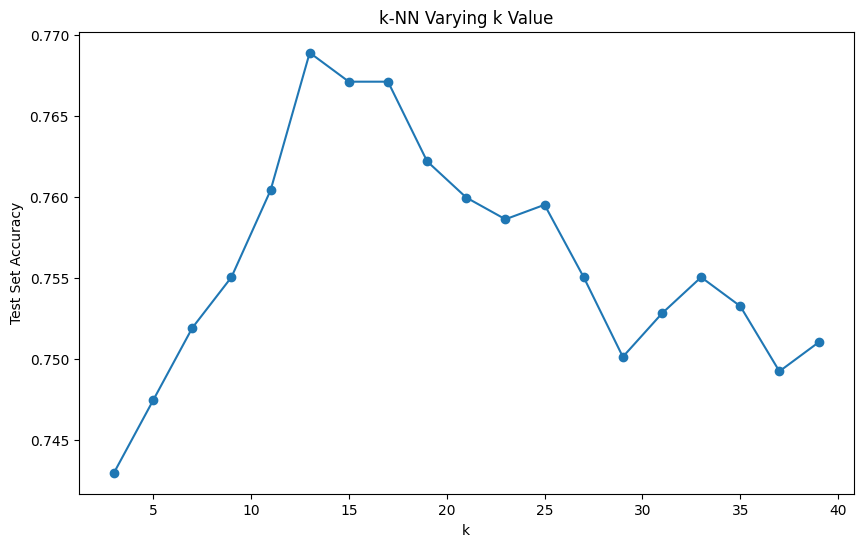

In [80]:
# Plot the k values vs. accuracy on the test set
plt.figure(figsize=(10, 6))
plt.plot(k_values, test_accuracies, marker='o')
plt.xlabel('k')
plt.ylabel('Test Set Accuracy')
plt.title('k-NN Varying k Value')
plt.show()

## 3. DecisionTreeClassifier

In [81]:
model = DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [82]:
y_pred = model.predict(X_test)
y_pred

array([1, 0, 1, ..., 0, 1, 1])

In [83]:
accuracy_score(y_test,y_pred)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

Accuracy: 0.780564263322884


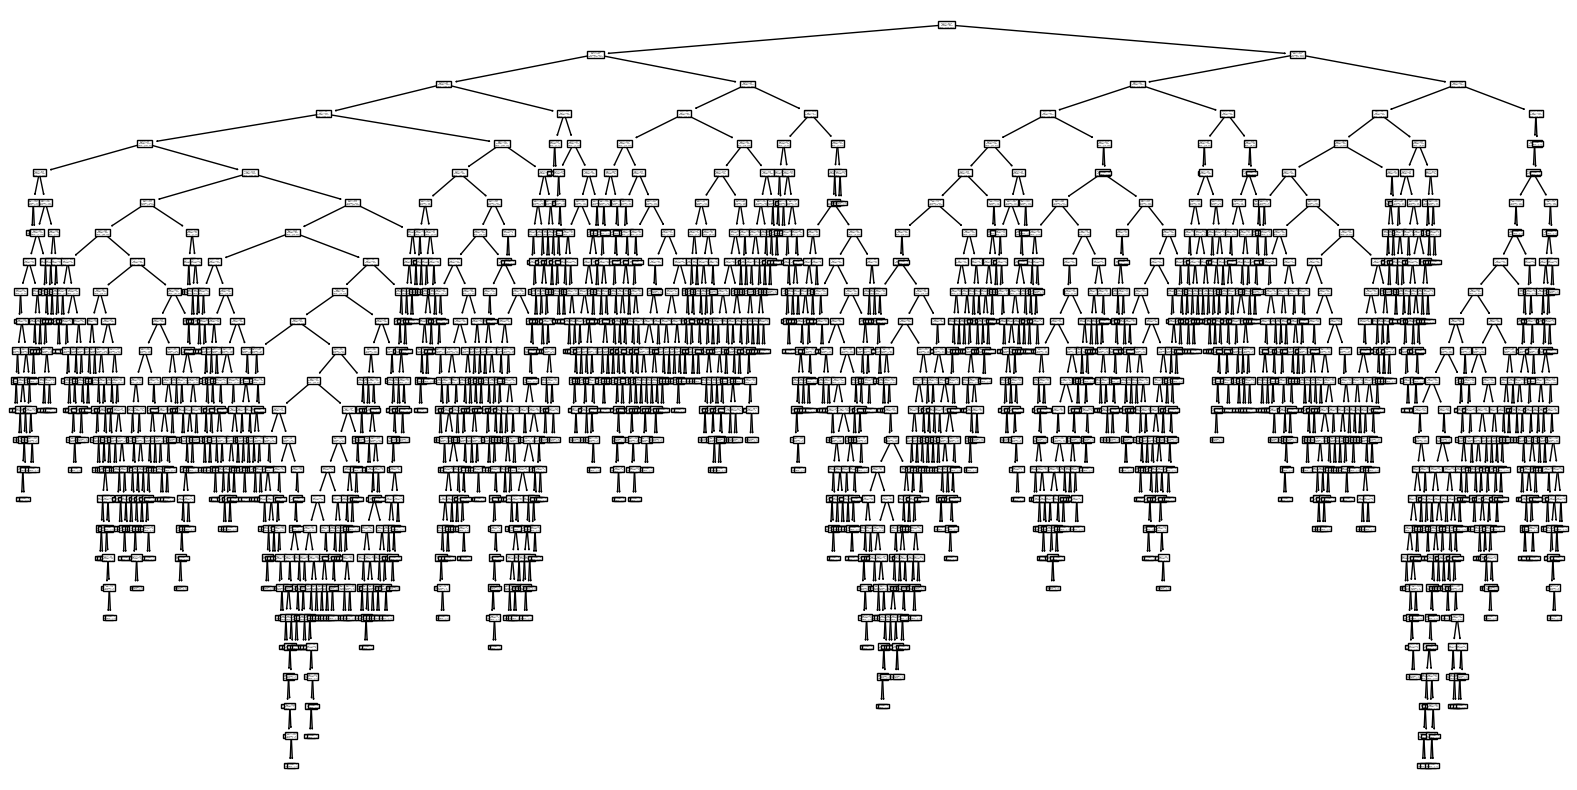

In [85]:
plt.figure(figsize=(20, 10))


tree.plot_tree(model)


plt.show()

## 4. Random Forest

In [86]:
model = RandomForestClassifier(criterion='entropy',n_estimators=40) 
model.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=40)

In [87]:
accuracy_score(y_test,y_pred)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

Accuracy: 0.780564263322884


## Get feature importances

In [88]:
from sklearn.inspection import permutation_importance

results = permutation_importance(model,X_train,y_train, scoring='accuracy')
importances = results.importances_mean
indices = np.argsort(importances)[::-1]

# Print feature importance
print("Feature importances:")
for i in indices:
    print(f"{X_train.columns[i]}: {importances[i]}")


Feature importances:
duration: 0.32657632433643186
month: 0.08012095419419867
housing: 0.06408332400044796
balance: 0.05514615298465673
contact: 0.05120394221077389
age: 0.04986000671967743
day: 0.04553701422331726
pdays: 0.034113562548997646
poutcome: 0.032142457162056215
campaign: 0.02672191734796727
job: 0.02040542053981409
marital: 0.01597043341919586
education: 0.014626497928099447
previous: 0.008242804345391397
loan: 0.00801881509687532
default: 0.00035838279762572255


In [89]:

# Create a DataFrame from the feature importances
importance_data = {'Feature': ['duration', 'contact', 'loan', 'campaign', 'age', 'housing', 'previous', 'pdays', 'balance', 'day', 'default', 'education', 'poutcome', 'marital', 'job', 'month'],'Importance': [0.1121738156568485, 0.02165976033150414, 0.01408892373166093,  0.013640945234628799, 0.01294657856422896, 0.010572292529958593, 0.007638033374398079, 0.006271698958450034, 0.00537574196438575, 0.0023518871094188043, 0.0015007279650577133, 0.0014335311905028902, 0.0005151752715869984, -0.0003359838727740705, -0.0018367118378317393,-0.003203046253779762]}
importance_df = pd.DataFrame(importance_data)
importance_df

Feature  Importance
0    duration    0.112174
1     contact    0.021660
2        loan    0.014089
3    campaign    0.013641
4         age    0.012947
5     housing    0.010572
6    previous    0.007638
7       pdays    0.006272
8     balance    0.005376
9         day    0.002352
10    default    0.001501
11  education    0.001434
12   poutcome    0.000515
13    marital   -0.000336
14        job   -0.001837
15      month   -0.003203

In [90]:
# Create a DataFrame for plotting
importance_df = pd.DataFrame({
    'Feature': np.array(x.columns)[indices],
    'Importance': importances[indices]
})

fig = px.bar(importance_df, x='Feature', y='Importance', title="Feature Importances", 
             labels={'Importance': 'Feature Importance', 'Feature': 'Features'},
             text='Importance')
fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig.update_layout(xaxis_title='Features', yaxis_title='Feature Importance', xaxis_tickangle=-45)
fig.show()


## 5. XGBoost

In [91]:
xgboost = xgb.XGBClassifier()
xgboost.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [92]:
y_pred = xgboost.predict(X_test)
y_pred

array([1, 0, 1, ..., 0, 1, 1])

In [93]:
accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

Accuracy: 0.8437080161218092


## 6. Naive Bayes

In [94]:
model = GaussianNB()# Initialize the Gaussian Naive Bayes model
model.fit(X_train, y_train)# Fit the model to the training data

GaussianNB()

In [95]:
# Predict using the test data
y_pred = model.predict(X_test)

In [96]:
# Evaluate the model accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 74.07%


Model Accuracy: 74.07%


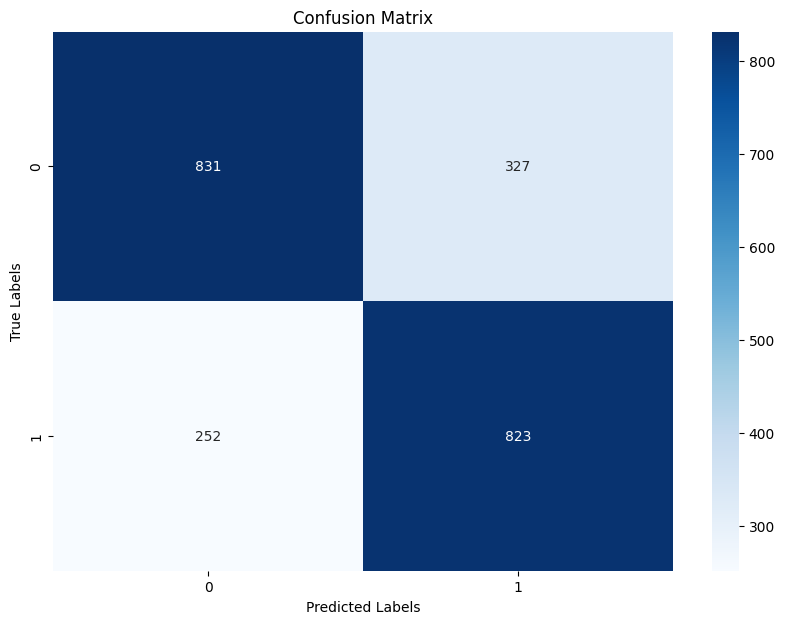


Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.72      0.74      1158
           1       0.72      0.77      0.74      1075

    accuracy                           0.74      2233
   macro avg       0.74      0.74      0.74      2233
weighted avg       0.74      0.74      0.74      2233



In [97]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

y_pred = model.predict(X_test)

# Evaluate the model accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))